In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# First training

Download and "learn" differences between cat and dog images.

In [6]:

#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)
     

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 174MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.164867,0.023991,0.007442,24:57


epoch,train_loss,valid_loss,error_rate,time
0,0.061092,0.029835,0.010149,31:40


# Test

Use a file upload control to upload a picture of a dog or cat

In [7]:
#hide_output
uploader = widgets.FileUpload()
uploader

NameError: name 'widgets' is not defined

In [ ]:
# Segmentation

In [14]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.044959,2.577761,01:04


epoch,train_loss,valid_loss,time
0,1.983986,1.793423,01:08
1,1.704243,1.452502,01:07
2,1.516809,1.286608,01:07
3,1.357913,1.354545,01:07
4,1.234191,0.981377,01:06
5,1.121020,0.959694,01:06
6,1.020469,0.876612,01:06
7,0.942522,0.866108,01:07


## Test

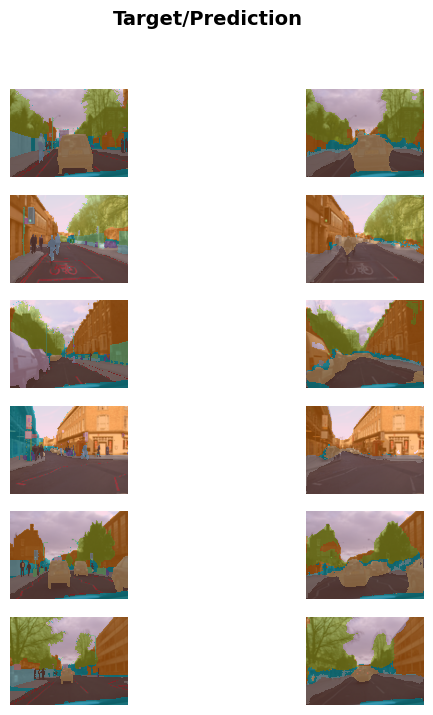

In [17]:
learn.show_results(max_n=6, figsize=(7,8))

## Movie sentiment analysis

In [15]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.876369,2.432976,01:00


epoch,train_loss,valid_loss,time
0,1.760883,1.587052,01:10
1,1.522690,1.339370,01:12
2,1.428232,1.175538,01:09
3,1.307517,1.001086,01:09
4,1.174290,0.802223,01:10
5,1.059109,0.761484,01:09
6,0.966515,0.733465,01:10
7,0.894775,0.725624,01:09


### Test it

In [19]:
learn.predict("I really liked that movie!")

FileNotFoundError: [Errno 2] No such file or directory: 'I really liked that movie!'

# Tabular

In [20]:

from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(3)
     

/usr/local/lib/python3.11/dist-packages/fastai/tabular/core.py:314: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


epoch,train_loss,valid_loss,accuracy,time
0,0.381415,0.357763,0.834920,00:04
1,0.364871,0.347846,0.836302,00:04
2,0.350079,0.343327,0.843827,00:06


## Movie recommendations

In [21]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.532116,1.330051,00:00


epoch,train_loss,valid_loss,time
0,1.399663,1.279632,00:00
1,1.307955,1.132677,00:00
2,1.060632,0.854893,00:00
3,0.824434,0.704544,00:00
4,0.702081,0.665861,00:00
5,0.663165,0.649876,00:00
6,0.617558,0.645449,00:00
7,0.615327,0.642048,00:00
8,0.600446,0.640337,00:00
9,0.600708,0.640073,00:00


In [22]:

learn.show_results()

,userId,movieId,rating,rating_pred
0,83.0,40.0,3.0,3.306220
1,86.0,76.0,3.5,3.645015
2,99.0,27.0,3.5,3.829280
3,89.0,32.0,3.5,3.078816
4,28.0,23.0,1.0,2.967264
5,86.0,53.0,4.0,4.046700
6,1.0,20.0,1.0,3.541567
7,1.0,98.0,1.5,3.596618
8,49.0,36.0,4.0,3.785500
